<a href="https://colab.research.google.com/github/TaurusAg9/Bank_Personal_Loan/blob/master/Bank_Personal_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Description:**The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Context:** This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Objective:** The classification goal is to predict the likelihood of a liability customer buying personal loans which means we have to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset.

#Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [217]:
df=pd.read_csv('//content//sample_data//Bank_Personal_Loan_Modelling.csv')

In [218]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


#Exploratory Data Analysis 

In [219]:
#Printing the shape of the dataset by which we can know the number of rows and columns
print(df.shape)

(5000, 14)


We can see from the ouput below that there are 5000 rows and 14 columns

In [220]:
#Showing the info of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [221]:
#Describing the dataset
print(df.describe())

                ID          Age  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean   2500.500000    45.338400  ...     0.596800     0.294000
std    1443.520003    11.463166  ...     0.490589     0.455637
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.000000  ...     1.000000     0.000000
75%    3750.250000    55.000000  ...     1.000000     1.000000
max    5000.000000    67.000000  ...     1.000000     1.000000

[8 rows x 14 columns]


In [222]:
#Describing the datset but in a understandable way
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [223]:
#Finding the data type of each column 
print(df.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


We can see that most of the columns are of int64 datatype.

In [224]:
#Finding if there are any null values in the dataset
print(df.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


We can observe here that there are no null values in any of the columns.

In [225]:
#Printing Number Of Unique Data
print(df.nunique())

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64



We can see that various columns have categorical values like Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard. Lets find out the number of values in each of these columns.

In [226]:
l = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in l:
    print(col)
    print(df[col].value_counts())
    print("**"*20)

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
****************************************
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
****************************************
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
****************************************
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
****************************************
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
****************************************
Online
1    2984
0    2016
Name: Online, dtype: int64
****************************************
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
****************************************


#Dropping Irrelevant Columns

In [227]:
#Dropping irrelevant columns
experience = df['Experience']
age = df['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

We can see here that there is a great percentage of correlation approximately 99.5% between experince and age.So, it is best to have only one column from Experience column and Age column.Hence, we keep age column and drop the Ecxperience column.

In [228]:
df = df.drop(['ID','Experience','ZIP Code'],axis=1)
df.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


We have dropped Zip column as it is having many unique values, ID column because it does'nt have any effect on the data and lastly Experience column as it had great percentage of correaltion with Age column.

#Univariate Analysis

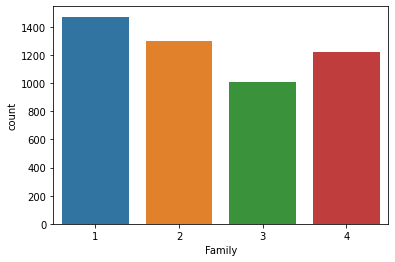

In [238]:
sns.countplot(x = 'Family', data = df)

Here,we can observe that most of the customers are single.

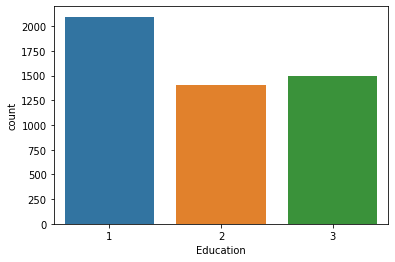

In [239]:
sns.countplot(x = 'Education', data = df)

Here, we can observe that most of the customers are undergraduates.

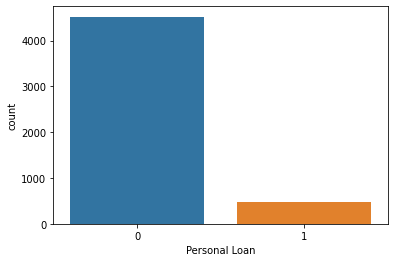

In [240]:
sns.countplot(x = 'Personal Loan', data = df)

We can observe that the percentage of customers applying for loan is very less.

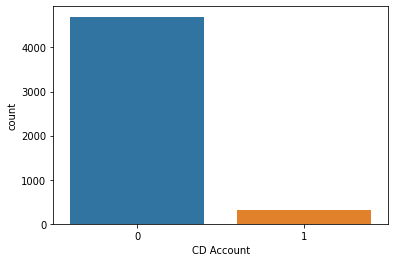

In [241]:
sns.countplot(x = 'CD Account', data = df)

We can observe that a great percentage of customers who do not have CD Account do not apply for loan. 

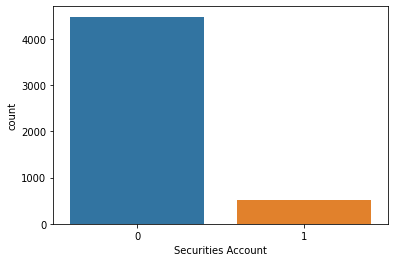

In [242]:
sns.countplot(x = 'Securities Account', data = df)

We can observe that a great percentage of customers who do not have a security account do not apply for loan.

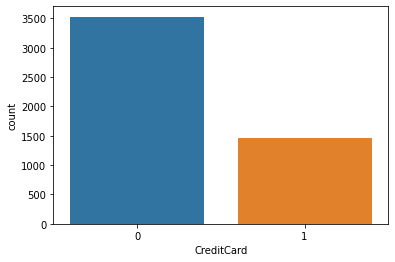

In [243]:
sns.countplot(x = 'CreditCard', data = df)

We can observe that a great percentage of customers who do not have a credit card do not apply for loan.

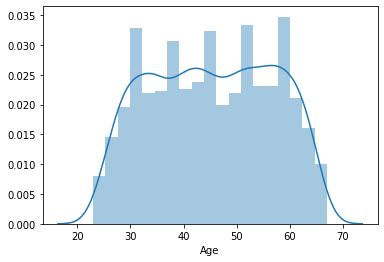

In [244]:
sns.distplot(df['Age'])

Observation:Age column is normally distributed.

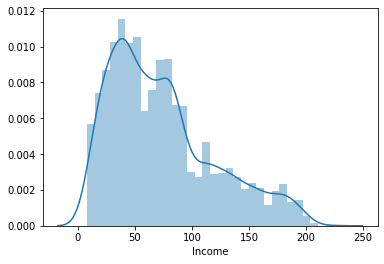

In [245]:
sns.distplot(df['Income'])

Observation: The above distributionis is right skewed distribution because the tail goes to the right.

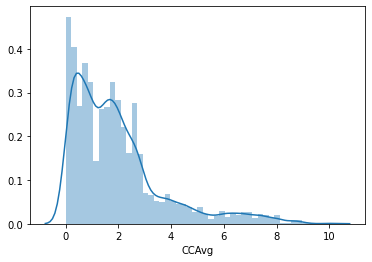

In [246]:
sns.distplot(df['CCAvg'])

Observation: The above distributionis is right skewed distribution because the tail goes to the right and most of the customers monthly avg. spending on credit cards is between 1k to 2.5K. There are very few customers whose monthly avg. spending on credit card is more than 8k.





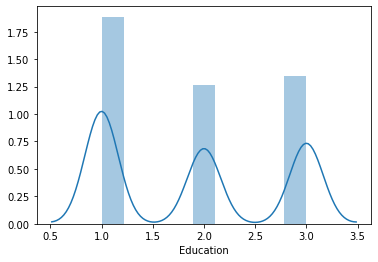

In [247]:
sns.distplot(df['Education'])

Observation: Undergrad level customers are more than the Graduate and Advanced/Professional customers.

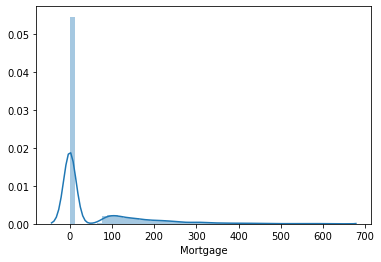

In [248]:
sns.distplot(df['Mortgage'])

Observation:The above distributionis is right skewed distribution because the tail goes to the right.Most of the customers do not have mortgage. There are more customers whose mortgage amount is between  80000to 150000 . Very few customers whos mortgage amount is more than $600000.

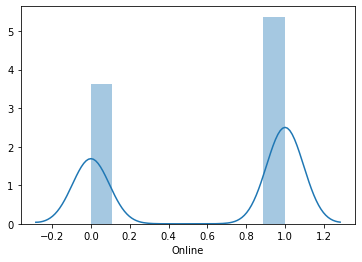

In [249]:
sns.distplot(df['Online'])

Observation: Number of customers who have Online accout is geater than the number of customers who do not have online account.

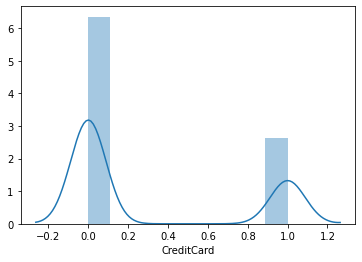

In [250]:
sns.distplot(df['CreditCard'])

Observation:  Number of customers without Credit Card is almost double than the number of customers with Credit Card.

#Bivariate Analysis

Text(0.5, 0, 'Education')

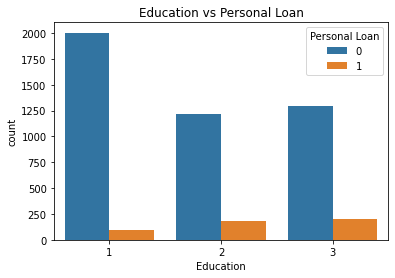

In [251]:
sns.countplot(x = 'Education', data = df, hue = 'Personal Loan')
plt.title('Education vs Personal Loan')
plt.xlabel('Education')

We can observe that Advanced/Professionals are taking high loans and undergrads are taking the lowest loans.

Text(0.5, 0, 'Income')

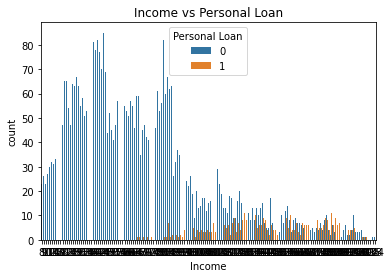

In [252]:
sns.countplot(x = 'Income', data = df, hue = 'Personal Loan')
plt.title('Income vs Personal Loan')
plt.xlabel('Income')

We can observe that the customers whose income is more apply for loans.

Text(0.5, 0, 'Family')

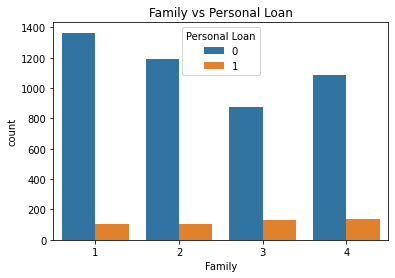

In [253]:
sns.countplot(x = 'Family', data = df, hue = 'Personal Loan')
plt.title('Family vs Personal Loan')
plt.xlabel('Family')

We can observe that people having 4 family members are applying for more loans.

Text(0.5, 0, 'Securities Account')

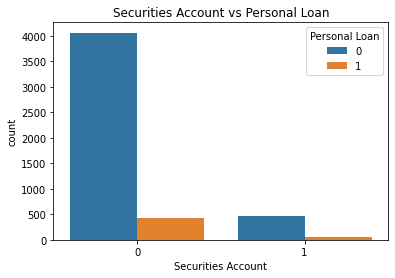

In [254]:
sns.countplot(x = 'Securities Account', data = df, hue = 'Personal Loan')
plt.title('Securities Account vs Personal Loan')
plt.xlabel('Securities Account')

We can observe that people not having Sercurities Account are taking more loans than people having Sercurities Account.

Text(0.5, 0, 'CD Account')

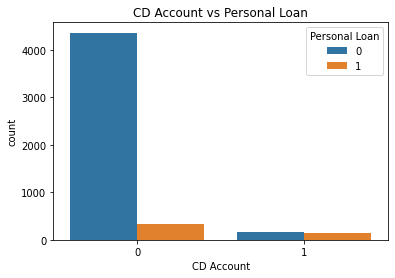

In [255]:
sns.countplot(x = 'CD Account', data = df, hue = 'Personal Loan')
plt.title('CD Account vs Personal Loan')
plt.xlabel('CD Account')

We can observe that people not having CD Account are taking more loans than people having CD Account.

Text(0.5, 0, 'Online')

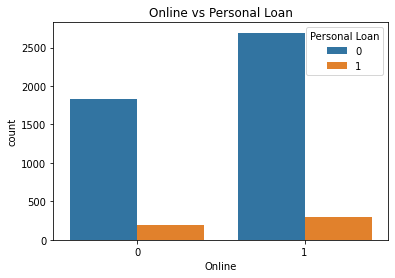

In [256]:
sns.countplot(x = 'Online', data = df, hue = 'Personal Loan')
plt.title('Online vs Personal Loan')
plt.xlabel('Online')

We can observe that people having online account are taking more loans than people not having online accounts.

Text(0.5, 0, 'Credit Card')

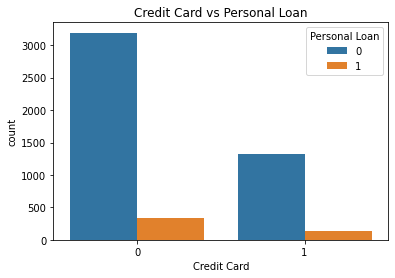

In [257]:
sns.countplot(x = 'CreditCard', data = df, hue = 'Personal Loan')
plt.title('Credit Card vs Personal Loan')
plt.xlabel('Credit Card')

We can observe that people not having credit cards are taking more loans than people having credit cards.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2e7057ba8>,
      dtype=object)

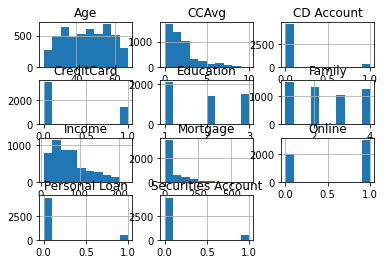

In [258]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2e6aafda0>,
      dtype=object)

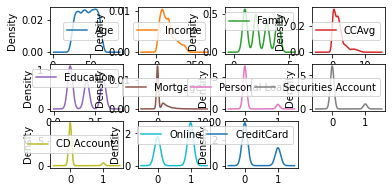

In [259]:
df.plot(kind='density',subplots=True,layout=(4,4),sharex=False)

Age                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
Income                 AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Family                 AxesSubplot(0.529348,0.71587;0.168478x0.16413)
CCAvg                  AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education                AxesSubplot(0.125,0.518913;0.168478x0.16413)
Mortgage              AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Personal Loan         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Securities Account    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
CD Account               AxesSubplot(0.125,0.321957;0.168478x0.16413)
Online                AxesSubplot(0.327174,0.321957;0.168478x0.16413)
CreditCard            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

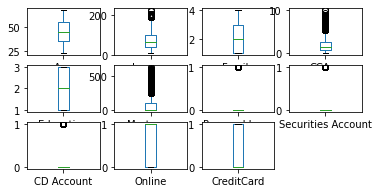

In [260]:
df.plot(kind='box',subplots=True,layout=(4,4),sharex=False)

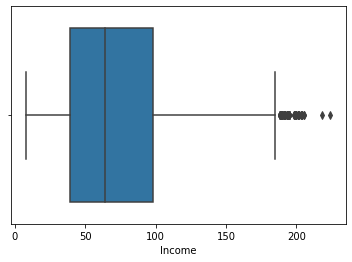

In [261]:
sns.boxplot(x='Income',hue='Personal Loan', data = df)

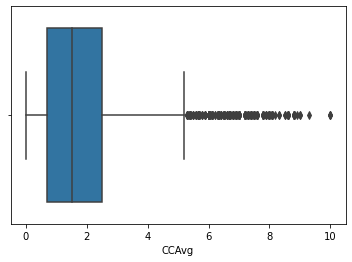

In [262]:
sns.boxplot(x='CCAvg', data = df)

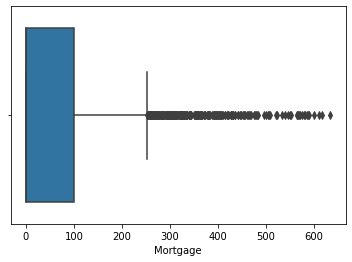

In [263]:
sns.boxplot(x='Mortgage', data = df)

We can observe that there are some otliers for the above columns which will be rectified in the feature transformation.

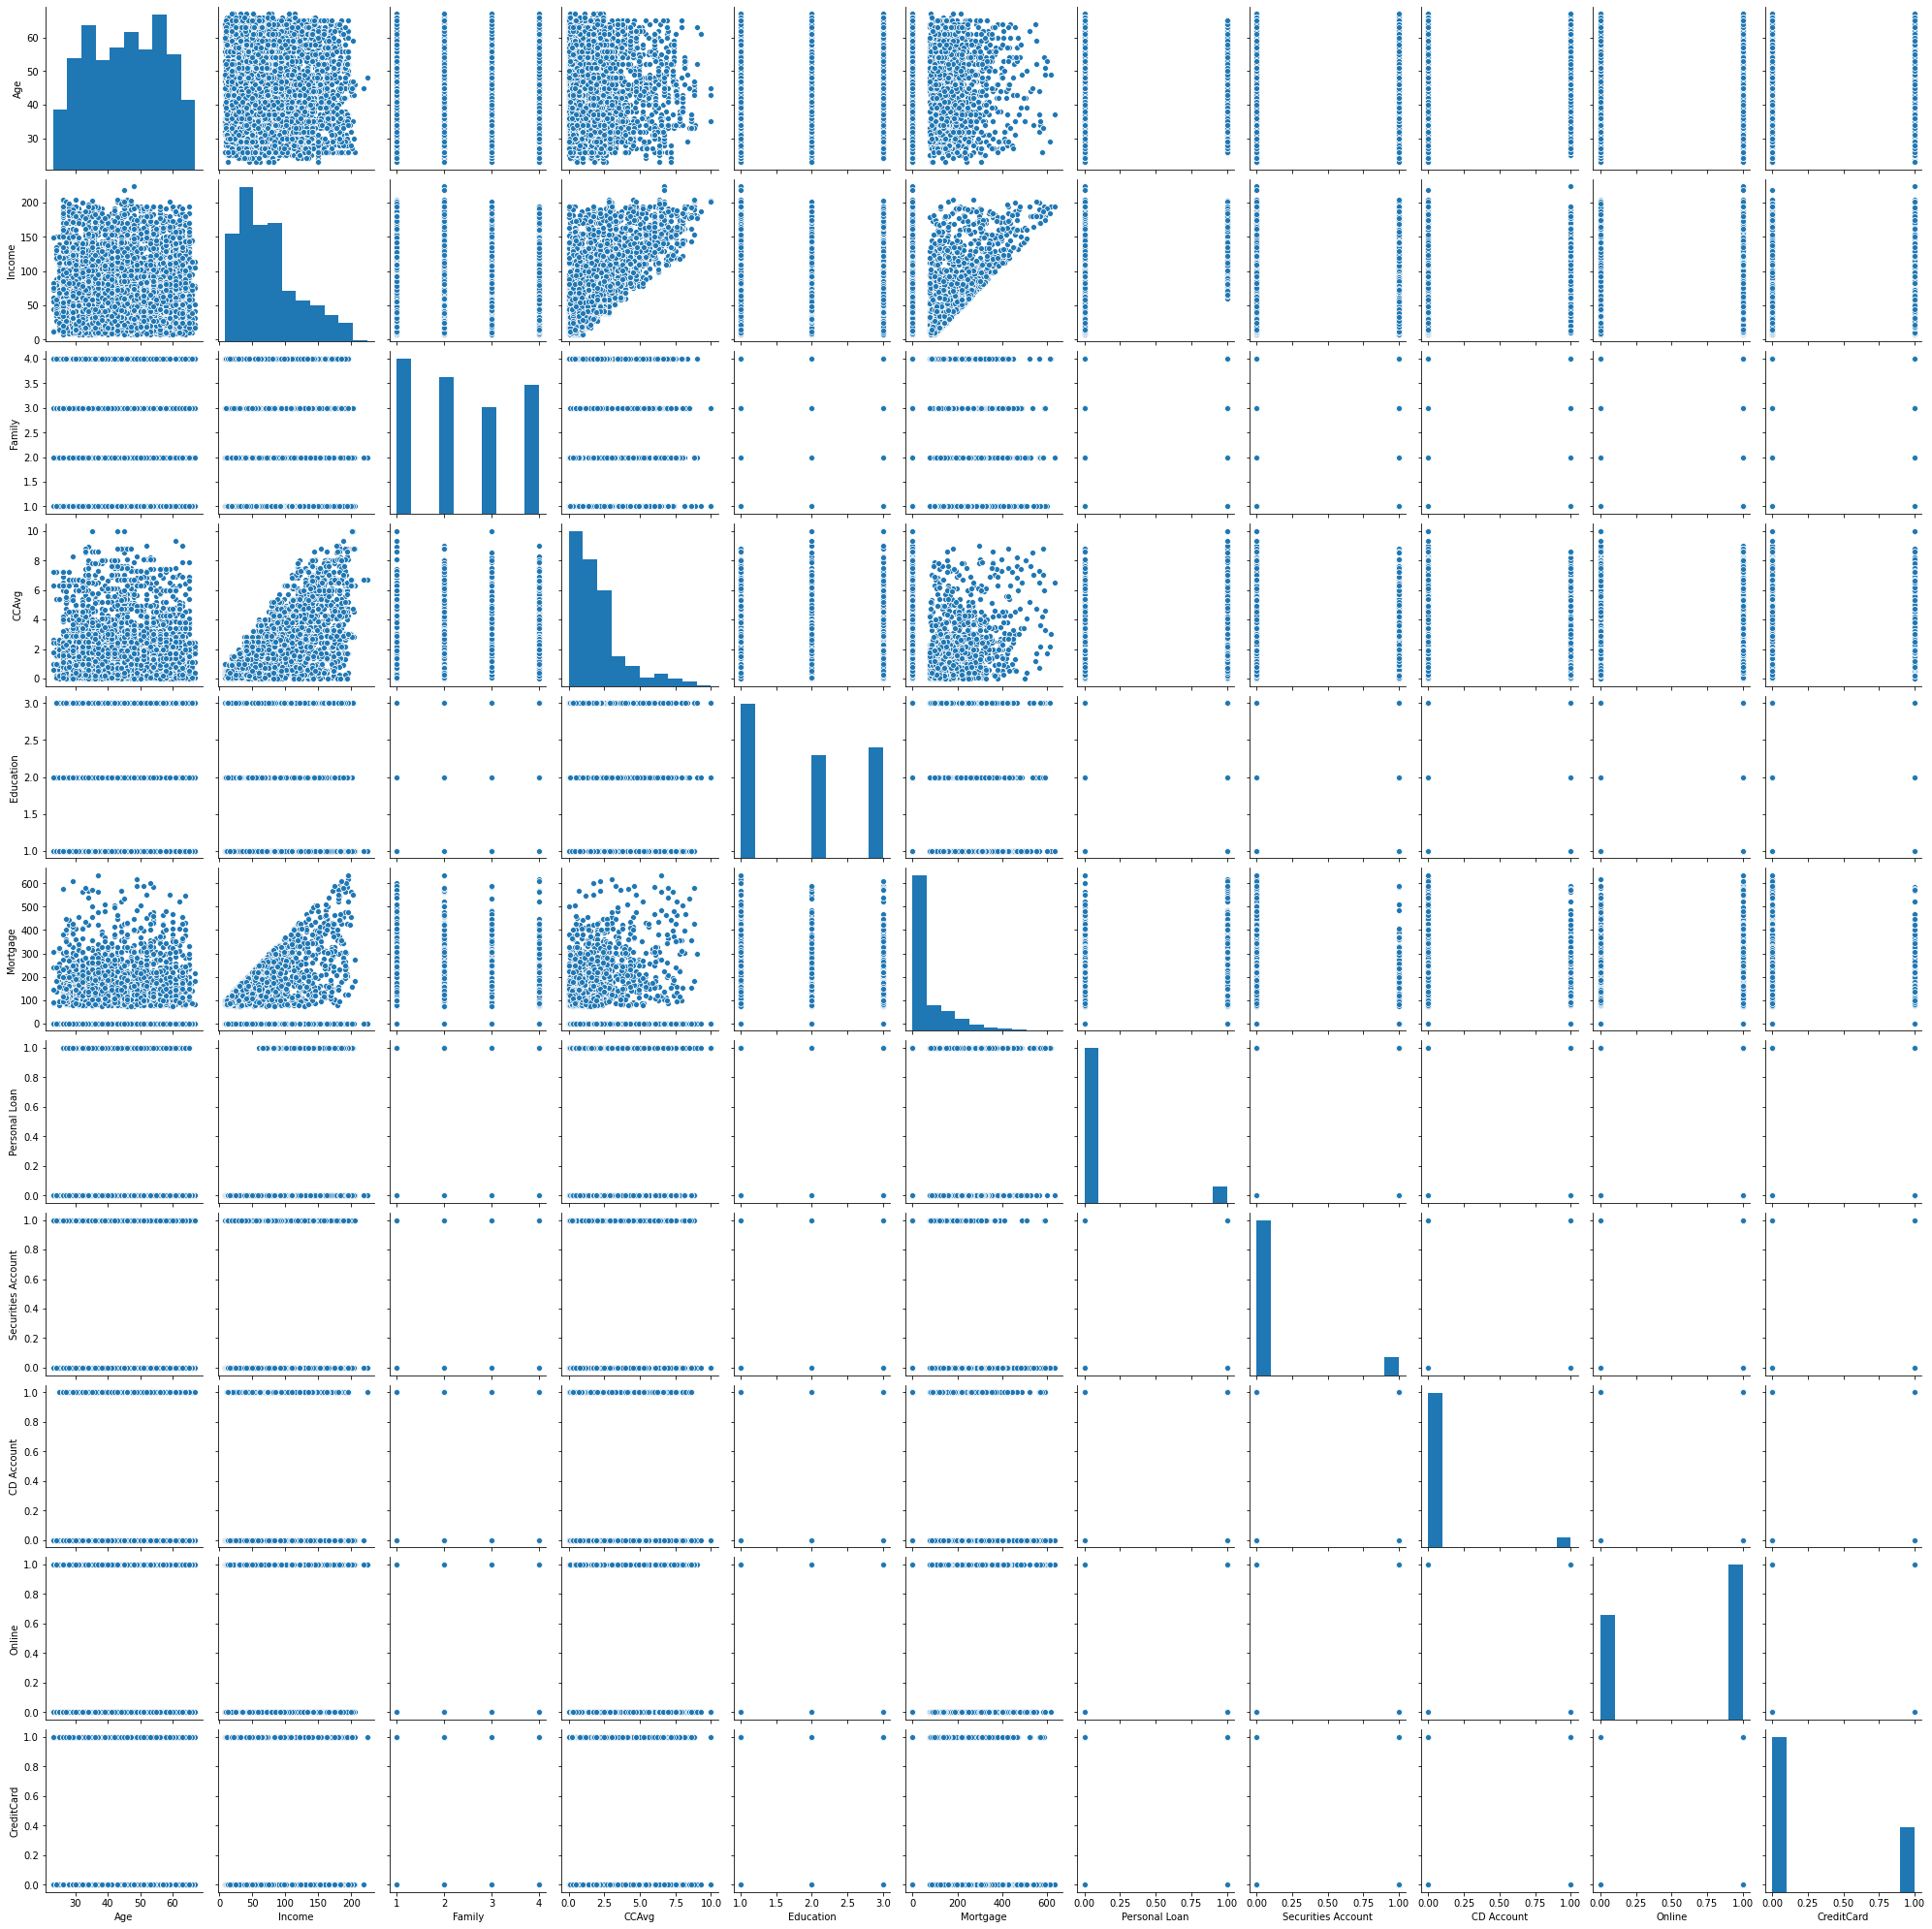

In [265]:
sns.pairplot(df)

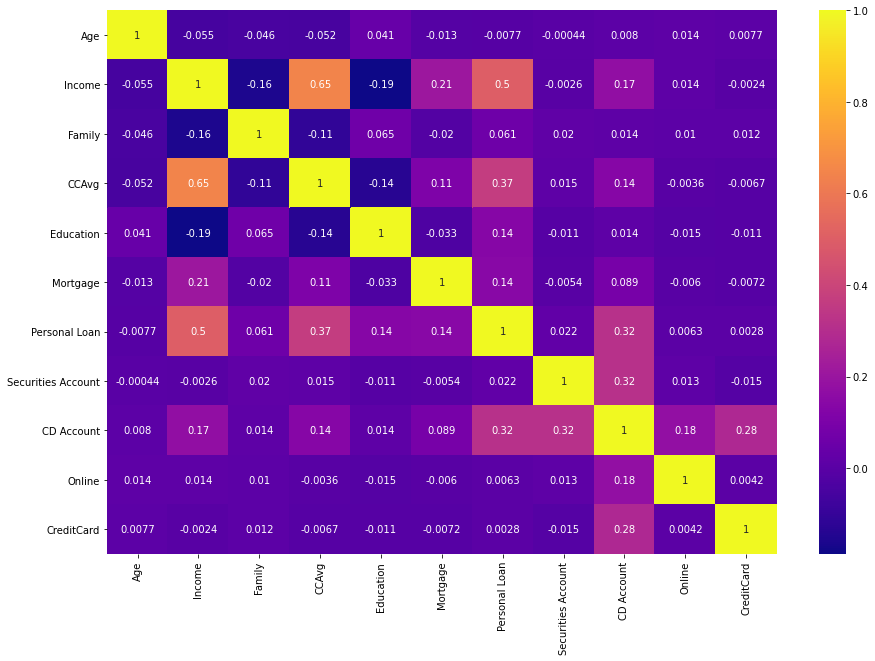

In [266]:
fig.ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

#Transformation Of Feature Variables

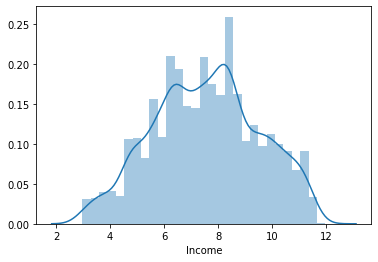

In [267]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(df['Income'].values.reshape(-1,1))
df['Income']=pt.transform(df['Income'].values.reshape(-1,1))
sns.distplot(df['Income'])

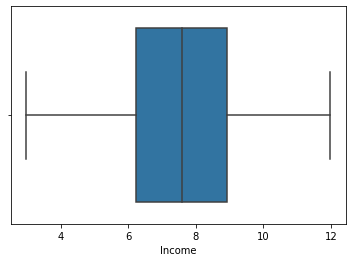

In [268]:
sns.boxplot(x='Income', data = df)

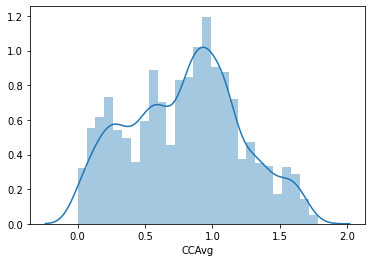

In [269]:
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(df['CCAvg'].values.reshape(-1,1))
df['CCAvg']=pt.transform(df['CCAvg'].values.reshape(-1,1))
sns.distplot(df['CCAvg'])

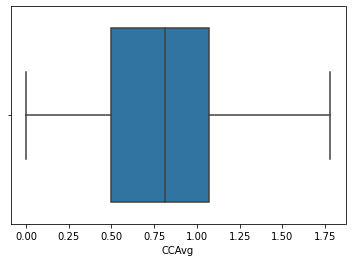

In [270]:
sns.boxplot(x='CCAvg', data = df)

As told in the above section the outliers have been removed.

As our Target Column(Personal Loan) is in middle of dataframe so for more convinient I have drop the personal loan column from the original place and appended at last of dataframe.

In [271]:
df['Mortgage_Int']=pd.cut(df['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
df.drop(['Mortgage'],axis=1,inplace=True)

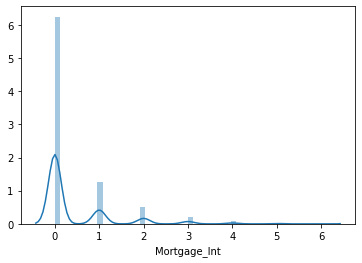

In [272]:
sns.distplot(df['Mortgage_Int'])

In [273]:
loan_counts = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


Observation:Out of 5000 data points, 4520 are labeled as 0 and 480 as 1. Percentage of customers who took loan is significantlly greater than customers who did not take loan. I have also show the percentage using in pie chart below..

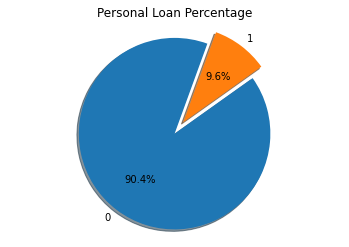

In [274]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

As our Target Column(Personal Loan) is in middle of dataframe so for more convinient I have drop the personal loan column from the original place and appended at last of dataframe.

In [275]:
personal_loan = df['Personal Loan']
df.drop(['Personal Loan'], axis=1, inplace = True)
df['Personal Loan'] = personal_loan
df.head(5)

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int,Personal Loan
0,25,6.827583,4,0.845160,1,1,0,0,0,0,0
1,45,5.876952,3,0.814478,1,1,0,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,1,0,0


#Splitting The Data

In [276]:
x=df.iloc[:,0:-1]
y=df["Personal Loan"]

In [277]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
scx.fit_transform(x_train)
scx.transform(x_test)

array([[-0.97265109,  1.804387  , -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.85873161,  0.38356794, -0.34389746, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.24827071,  1.16034314, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       ...,
       [ 0.68431421, -0.96255849, -0.34389746, ..., -1.19253735,
         1.52960605,  0.68340496],
       [-0.97265109, -0.36542751, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [-0.01335539, -0.12557467,  0.52957214, ...,  0.83854816,
        -0.65376311, -0.47490853]])

#Model Building

1.Logistic Regression

In [278]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
print('Training Accuracy: ',model.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred)*100)
a_lg=accuracy_score(y_test,y_pred)
confusion_mat=confusion_matrix(y_test,y_pred)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred))
print('\nMean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Training Accuracy:  95.37142857142857
Testing Accuracy:  94.6

Confusionn Matrix:
 [[1328   28]
 [  53   91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.76      0.63      0.69       144

    accuracy                           0.95      1500
   macro avg       0.86      0.81      0.83      1500
weighted avg       0.94      0.95      0.94      1500


Mean Absolute Error:  0.054
Root Mean Squared Error 0.232379000772445


For Logistic Regression model, we can observe that the accuracy=94.6% is good but the false negative in confusion matrix is more i.e approximately 36.8% which we don't need and the values of precision, recall and f1-score are average.

Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

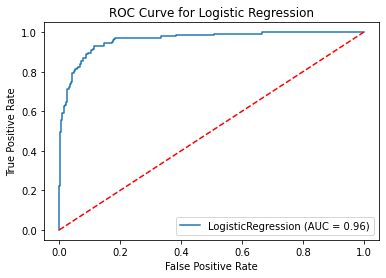

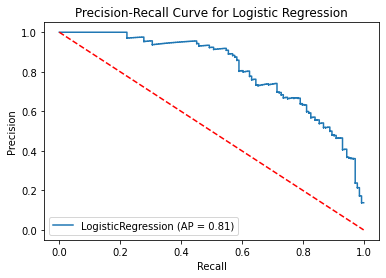

In [279]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(model, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Logistic Regression')
plot_precision_recall_curve(model, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for Logistic Regression')

Here, we can observe that AUC=0.96 and AP=0.81 which is good.

2.Support Vector Machines

In [280]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(x_train, y_train)
y_pred1 = svc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
print('Training Accuracy: ',svc.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred1)*100)
a_svc=accuracy_score(y_test,y_pred1)
confusion_mat=confusion_matrix(y_test,y_pred1)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred1))
print('\nMean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

Training Accuracy:  90.4
Testing Accuracy:  90.4

Confusionn Matrix:
 [[1356    0]
 [ 144    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1356
           1       0.00      0.00      0.00       144

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.82      0.90      0.86      1500


Mean Absolute Error:  0.096
Root Mean Squared Error:  0.30983866769659335


Here,the accuracy is not as good compared to the previous model but we can observe that the values of precision,recall,f1-score are very poor and that false negative value in confusion matrix is  more than logistic regression model.

Text(0.5, 1.0, 'Precision-Recall Curve for SVM')

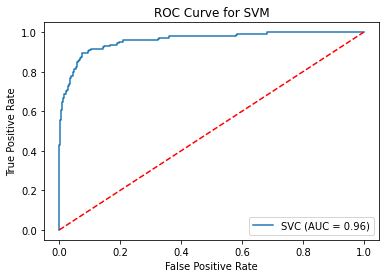

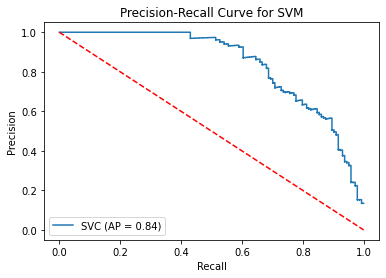

In [281]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(svc, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for SVM')

plot_precision_recall_curve(svc, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for SVM')

Here,the AUC and AP is good.

3.KNeighbors Classifier

In [282]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()
model1.fit(x_train,y_train)
y_pred2=model1.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Training Accuracy: ',model1.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred2)*100)
a_knn=accuracy_score(y_test,y_pred2)
confusion_mat=confusion_matrix(y_test,y_pred2)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred2))
print('\nMean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred2))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Training Accuracy:  96.51428571428572
Testing Accuracy:  96.2

Confusionn Matrix:
 [[1352    4]
 [  53   91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1356
           1       0.96      0.63      0.76       144

    accuracy                           0.96      1500
   macro avg       0.96      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500


Mean Absolute Error:  0.038
Root Mean Squared Error:  0.19493588689617927


In this model,we can observe that the accuracy=96.2% is good compared to the previous models and we can also observe that precision is good,recall is average,f1-score is just above average and that false positive is less than logistic regression model but false negative is the same as the logistic regression.

Text(0.5, 1.0, 'Precision-Recall Curve for SVM')

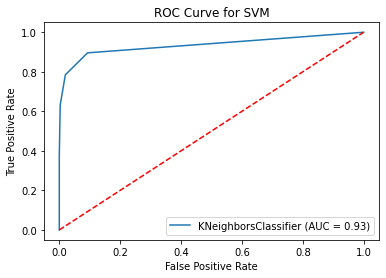

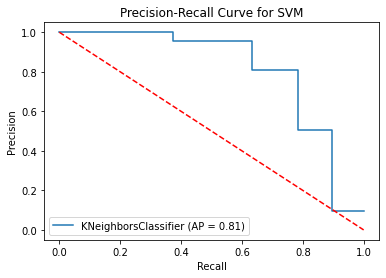

In [283]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(model1, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for SVM')

plot_precision_recall_curve(model1, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for SVM')

Here, we can see that AUC=0.93 is slightly less than the previous models.

4.Naive Bayes

In [284]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x_train, y_train)
y_pred3 = model2.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Training Accuracy: ',model2.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred3)*100)
a_gnb=accuracy_score(y_test,y_pred3)
confusion_mat=confusion_matrix(y_test,y_pred3)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred3))
print('\nMean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred3))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

Training Accuracy:  90.85714285714286
Testing Accuracy:  91.33333333333333

Confusionn Matrix:
 [[1293   63]
 [  67   77]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1356
           1       0.55      0.53      0.54       144

    accuracy                           0.91      1500
   macro avg       0.75      0.74      0.75      1500
weighted avg       0.91      0.91      0.91      1500


Mean Absolute Error:  0.08666666666666667
Root Mean Squared Error 0.2943920288775949


Here, we can observe that the accuracy=91.4% is good but less than the accuracies of the previous models and we can also observe that the precision,recall,f1-score are poor and false negative and false positive are more.

Text(0.5, 1.0, 'Precision-Recall Curve for SVM')

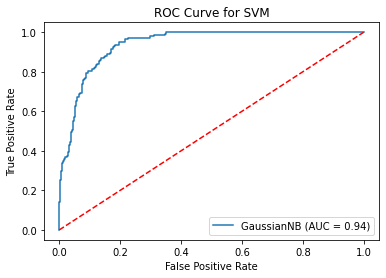

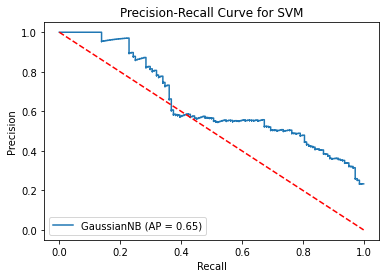

In [285]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(model2, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for SVM')

plot_precision_recall_curve(model2, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for SVM')

Here,the values of AUC and AP are less than the previous models.

5.Decision Tree

In [286]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0,max_depth=6)
decisiontree.fit(x_train, y_train)
y_pred5 = decisiontree.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Training Accuracy: ',decisiontree.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred5)*100)
a_dtc=accuracy_score(y_test,y_pred5)
confusion_mat=confusion_matrix(y_test,y_pred5)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred5))
print('\nMean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred5))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

Training Accuracy:  99.17142857142856
Testing Accuracy:  98.13333333333333

Confusionn Matrix:
 [[1345   11]
 [  17  127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.88      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500


Mean Absolute Error:  0.018666666666666668
Root Mean Squared Error 0.13662601021279466


This model is the best model until now, because the accuracy=98.14% is excellent and can also observe that the value of false negative is very less compared to other models which is what we want and precision,recall,f1-score are good.

Text(0.5, 1.0, 'Precision-Recall Curve for Decision Tree')

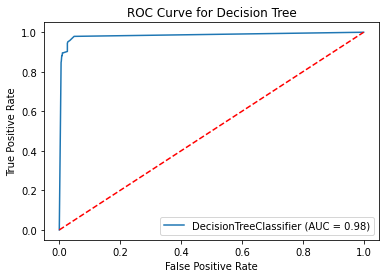

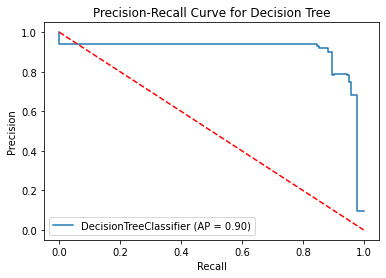

In [287]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(decisiontree, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Decision Tree')

plot_precision_recall_curve(decisiontree, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for Decision Tree')

Here, we can see that the AUC and AP values are excellent too.This is the best model till now.

6.Linear SVC

In [288]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state=0)
linear_svc.fit(x_train, y_train)
y_pred6 = linear_svc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Training Accuracy: ',linear_svc.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred6)*100)
a_lsvc=accuracy_score(y_test,y_pred6)
confusion_mat=confusion_matrix(y_test,y_pred6)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred6))
print('\nMean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred6))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

Training Accuracy:  95.28571428571428
Testing Accuracy:  95.19999999999999

Confusionn Matrix:
 [[1350    6]
 [  66   78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1356
           1       0.93      0.54      0.68       144

    accuracy                           0.95      1500
   macro avg       0.94      0.77      0.83      1500
weighted avg       0.95      0.95      0.95      1500


Mean Absolute Error:  0.048
Root Mean Squared Error 0.13662601021279466


This model is not half bad it is on par with Logistic regressin model with an accuracy of 95% but the false negative values are more and we can observe that precision is good,recall is average and f1-score is just above average.

Text(0.5, 1.0, 'Precision-Recall Curve for Linear SVM')

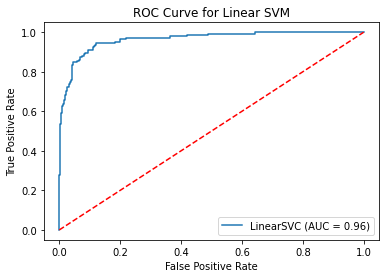

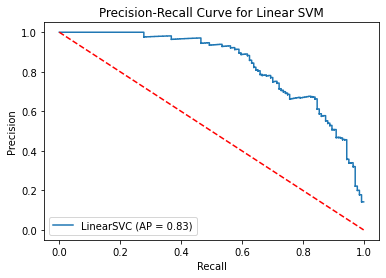

In [289]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(linear_svc, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Linear SVM')

plot_precision_recall_curve(linear_svc, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for Linear SVM')

Here,the values of AUC and AP are good.

7.Perceptron

In [290]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(random_state=0)
perceptron.fit(x_train, y_train)
y_pred7 = perceptron.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Training Accuracy: ',perceptron.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred7)*100)
a_per=accuracy_score(y_test,y_pred7)
confusion_mat=confusion_matrix(y_test,y_pred7)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred7))
print('\nMean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred7))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred7)))

Training Accuracy:  91.31428571428572
Testing Accuracy:  91.73333333333333

Confusionn Matrix:
 [[1347    9]
 [ 115   29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1356
           1       0.76      0.20      0.32       144

    accuracy                           0.92      1500
   macro avg       0.84      0.60      0.64      1500
weighted avg       0.91      0.92      0.89      1500


Mean Absolute Error:  0.08266666666666667
Root Mean Squared Error 0.28751811537130434


In this model the accuracy is good but the values of false negative are more and we can observe that precision is above average but recall and f1-score are poor.

Text(0.5, 1.0, 'Precision-Recall Curve for Perceptron')

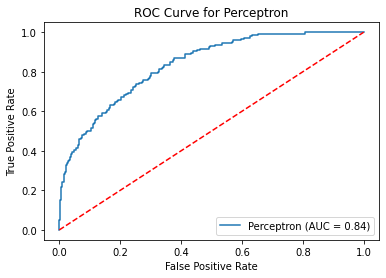

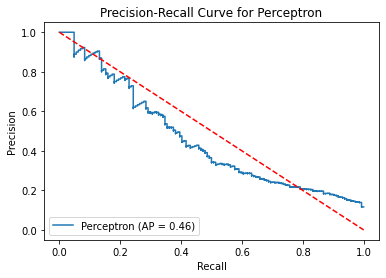

In [291]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(perceptron, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Perceptron')

plot_precision_recall_curve(perceptron, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for Perceptron')

Here,the AUC value is good but AP is very less.

8.Random Forest

In [292]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0,n_estimators=500,max_depth=6)
randomforest.fit(x_train, y_train)
y_pred8 = randomforest.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training Accuracy: ',randomforest.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred8)*100)
a_rf=accuracy_score(y_test,y_pred8)
confusion_mat=confusion_matrix(y_test,y_pred8)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred8))
print('\nMean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred8))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred8)))

Training Accuracy:  99.0
Testing Accuracy:  98.66666666666667

Confusionn Matrix:
 [[1356    0]
 [  20  124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       1.00      0.86      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.93      0.96      1500
weighted avg       0.99      0.99      0.99      1500


Mean Absolute Error:  0.013333333333333334
Root Mean Squared Error 0.11547005383792516


This model is an excellent model it is on par with the decision tree model with an accuracy of 98.7% which exceeds the accuracy of decision tree model and the value of false negative less than the decision tree and we can also observe that precision is excellent,recall and f1-score are good.So, random forest model is the best model till now. 

Text(0.5, 1.0, 'Precision-Recall Curve for Random Forest')

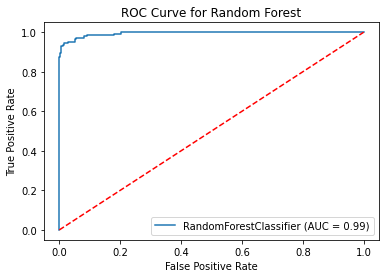

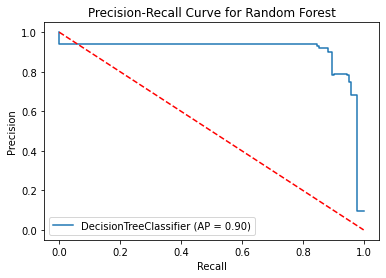

In [293]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(randomforest, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Random Forest')

plot_precision_recall_curve(decisiontree, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for Random Forest')

Here, the values of AUC is more than that of decision tree model and AP is same.So, this model is best model till now.

 9.Stochastic Gradient Descent

In [294]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred9 = sgd.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Training Accuracy: ',sgd.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred9)*100)
a_sgd=accuracy_score(y_test,y_pred9)
confusion_mat=confusion_matrix(y_test,y_pred9)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred9))
print('\nMean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred9))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred9)))

Training Accuracy:  95.02857142857142
Testing Accuracy:  95.0

Confusionn Matrix:
 [[1325   31]
 [  44  100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1356
           1       0.76      0.69      0.73       144

    accuracy                           0.95      1500
   macro avg       0.87      0.84      0.85      1500
weighted avg       0.95      0.95      0.95      1500


Mean Absolute Error:  0.05
Root Mean Squared Error 0.22360679774997896


In this model the accuracy is good but the false negative value is more and we can observe that precision is above average,recall is average and f1-score is above average.

Text(0.5, 1.0, 'Precision-Recall Curve for Stochastic Gradient Descent')

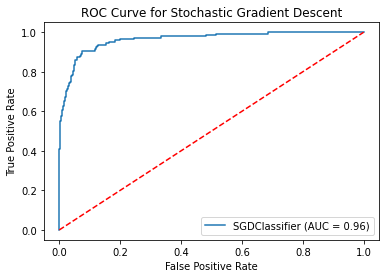

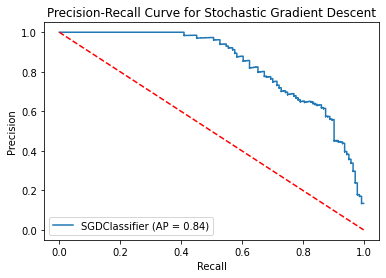

In [295]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(sgd, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Stochastic Gradient Descent')

plot_precision_recall_curve(sgd, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for Stochastic Gradient Descent')

Here, the AUC and AP values are good too.

10.Gradient Boosting Classifier

In [296]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier(random_state=0)
gbk.fit(x_train, y_train)
y_pred10 = gbk.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Training Accuracy: ',gbk.score(x_train,y_train)*100)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred10)*100)
a_gbc=accuracy_score(y_test,y_pred10)
confusion_mat=confusion_matrix(y_test,y_pred10)
print('\nConfusionn Matrix:\n',confusion_mat)
print('\nClassification Report:\n',classification_report(y_test,y_pred10))
print('\nMean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred10))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred10)))

Training Accuracy:  99.68571428571428
Testing Accuracy:  98.53333333333333

Confusionn Matrix:
 [[1347    9]
 [  13  131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.91      0.92       144

    accuracy                           0.99      1500
   macro avg       0.96      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500


Mean Absolute Error:  0.014666666666666666
Root Mean Squared Error 0.12110601416389967


This model is an excellent model with excellent accuracy, great precision value,good recall value, good f1-score and less false negative value but we cannot consider this model as the best model because false positive value is more than the random forest model which we considered the best model even if the false negative value is less.

Text(0.5, 1.0, 'Precision-Recall Curve for Gradient Boosting Classifier')

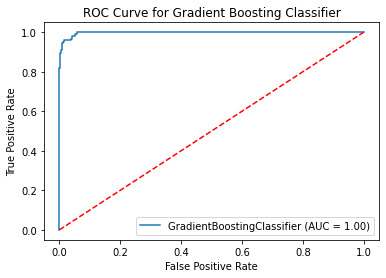

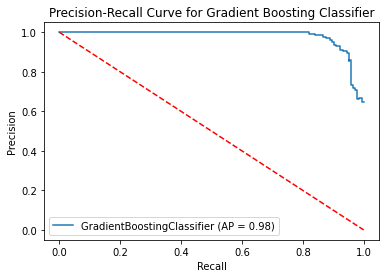

In [297]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(gbk, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Gradient Boosting Classifier')

plot_precision_recall_curve(gbk, x_test, y_test)
plt.plot([0, 1], [1, 0],'r--')
plt.title('Precision-Recall Curve for Gradient Boosting Classifier')

Here, the AUC and AP values are excellent.

In [298]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [a_svc, a_knn, a_lg, a_rf, a_gnb, a_per,a_lsvc, a_dtc,a_sgd, a_gbc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.986667
9,Gradient Boosting Classifier,0.985333
7,Decision Tree,0.981333
1,KNN,0.962000
6,Linear SVC,0.952000
8,Stochastic Gradient Descent,0.950000
2,Logistic Regression,0.946000
5,Perceptron,0.917333
4,Naive Bayes,0.913333
0,Support Vector Machines,0.904000


#Conclusion:

In the first step of this project we imported various libraries and load our data and get to know many thing about our dataset.

*   We found that age and experience are highly correlated so we droped the experience column.
*   ID and ZIPcode were not contributing factors for a person to take loan so we dropped them.
*   The Income and CCAvg column were left skewed so we applied Power transformation to them to normalize them.
*   The mortgage column was also skewed but since it was discrete so rather than power transformation, we use binning technique.
*   We made various models to predict whether a person will apply for personal loan or not.

From the above mentioned various models we can clearly observe that RANDOM FOREST CLASSIFIER MODEL is the best model because it's the accuracy is excellent,the values of precision, recall,f1-score is excellent and most importantly the value of false negative in the confusion matrix is very low compared to all the other models.



------------------------------------------------------------------------------------------------------------END------------------------------------------------------------------------------------------------------------------